In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
GloVe = {}
with open("glove.6B/glove.6B.100d.txt", "r", encoding="utf-8") as vector_file:
    for line in vector_file:
        line_content = line.split()
        word = line_content[0]
        # There's probably a better way to read strings into a FloatTensor
        word_vec = torch.from_numpy(np.asarray(line_content[1:], "float32"))
        GloVe[word] = word_vec

In [3]:
import csv
word_bank = []
with open('bad_words.csv') as bad_words_csv:
    word_bank = list(csv.reader(bad_words_csv, delimiter=","))[0]
print(word_bank)

['anal', 'anus', 'arse', 'ass', 'asshole', 'assfucker', 'bastard', 'bitch', 'cock', 'cocksucker', 'coon', 'crap', 'cunt', 'damn', 'dick', 'dirty', 'douche', 'erection', 'erotic', 'faggot', 'fuck', 'fucked', 'fuckass', 'fuckhole', 'homoerotic', 'whore', 'slut', 'motherfucker', 'genitals', 'orgasm', 'penis', 'piss', 'porn', 'pornography', 'pussy', 'retard', 'sex', 'sexual', 'shit', 'slut', 'tits', 'viagra', 'whore', 'breast', 'balls', 'testicles', 'bullshit', 'hate', 'defecate', 'racist', 'choke', 'hurt', 'kill', 'hate', 'moaning', 'boner', 'dead', 'hell']


In [4]:
num_words = 0
final_word_bank = []
for word in word_bank:
    word = word.lower()
    if word in GloVe:
        final_word_bank.append(word)
        
        
analyze_words = []
colors = ['blue' for word in final_word_bank]
colors += ['red' for word in analyze_words]
#print(colors)
final_word_bank += analyze_words



wb_embeddings = torch.zeros((len(final_word_bank), 100))

for i, word in enumerate(final_word_bank):
    #print(word)
    if word.lower() in GloVe:
        wb_embeddings[i] = GloVe[word.lower()]
        

In [29]:
low_dim_wb = TSNE(n_components=2, 
                  learning_rate='auto',
                  init='pca', 
                  perplexity=3).fit_transform(wb_embeddings)

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


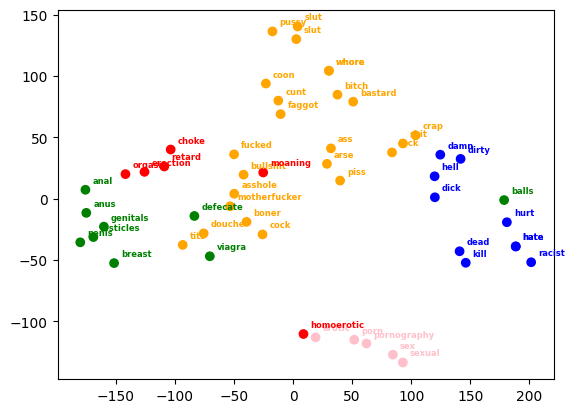

In [30]:
import matplotlib.pyplot as plt
plt.scatter(low_dim_wb[:,0], low_dim_wb[:,1], color=colors)
#plt.annotate()

num_analyze = len(analyze_words)
for c, label, x, y in zip(colors, final_word_bank[:], low_dim_wb[:, 0], low_dim_wb[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize=6, color=c, fontweight='bold')
    


torch.Size([54, 100])
[0 0 1 2 1 2 2 1 1 2 1 2 3 3 1 0 4 1 2 1 4 2 2 1 0 4 0 1 4 4 1 1 4 4 2 2 1
 4 2 0 3 0 1 3 1 3 0 3 3 3 1 1 3 2]


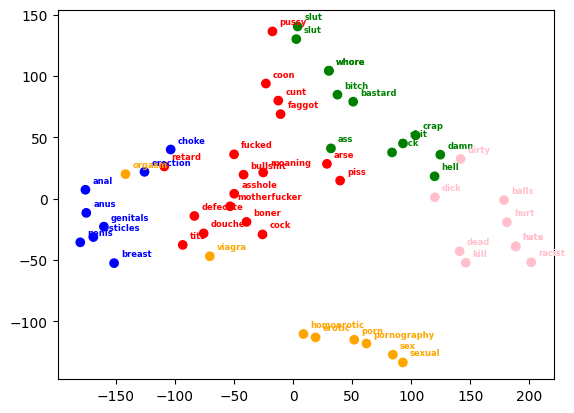

In [31]:
word_vectors = wb_embeddings
print(word_vectors.shape)
num_clusters = 5

clusterer = KMeans(n_clusters=num_clusters)
clusterer.fit(word_vectors)

labels = clusterer.labels_
print(labels)


color_pool = ['blue', 'red', 'green', 'pink', 'orange', 'black', 'yellow']
# these labels are colors
colors = []
for label in labels:
    colors.append(color_pool[label])


plt.scatter(low_dim_wb[:,0], low_dim_wb[:,1], color=colors)
#plt.annotate()

num_analyze = len(analyze_words)
for c, label, x, y in zip(colors, final_word_bank[:], low_dim_wb[:, 0], low_dim_wb[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize=6, color=c, fontweight='bold')
    
